In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from skbayes.linear_models import EBLogisticRegression,VBLogisticRegression

from sklearn import svm, datasets, linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.utils import shuffle

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [58]:
X = pd.read_csv('X.csv')
X_test = pd.read_csv('X_test.csv')
Y = pd.read_csv('Y.csv')
Y_test = pd.read_csv('Y_test.csv')

X_test = X_test.drop(X_test.columns[0], axis=1)
X = X.drop(X.columns[0], axis=1)
Y = Y.drop(Y.columns[0], axis=1)
Y_test = Y_test.drop(Y_test.columns[0], axis=1)


In [59]:
z = labels == 15
print(z[:,0].shape)
data.shape

(3200,)


(3200, 220)

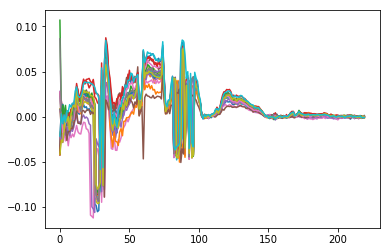

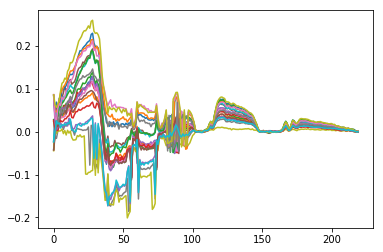

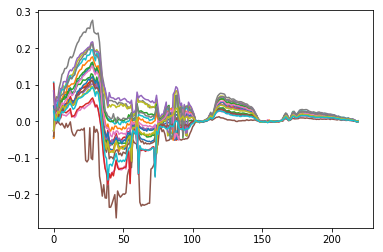

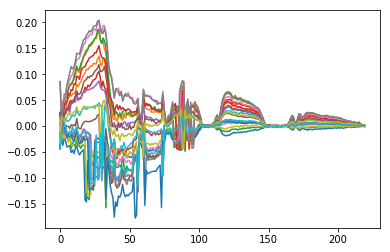

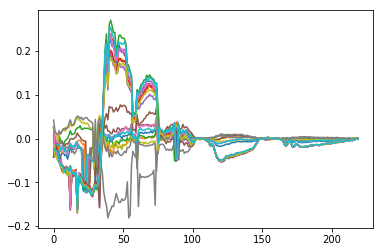

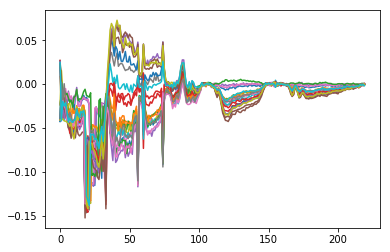

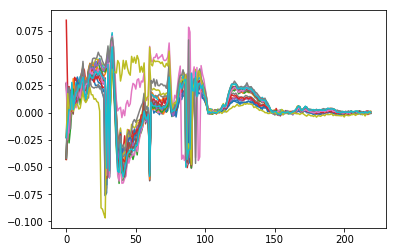

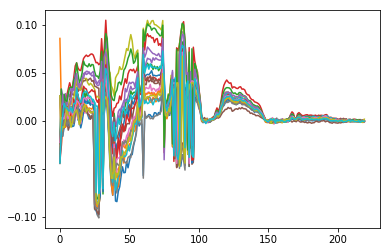

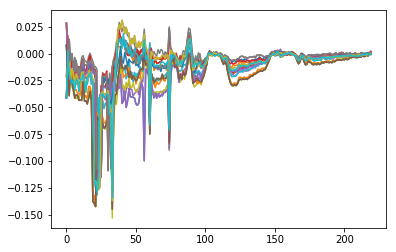

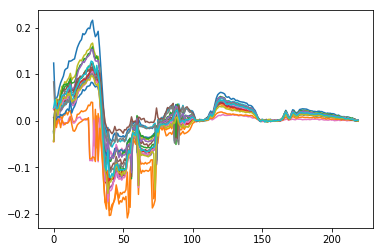

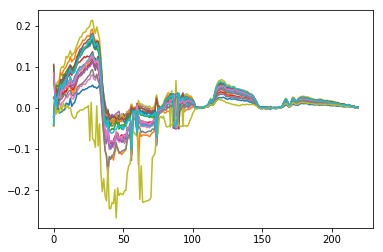

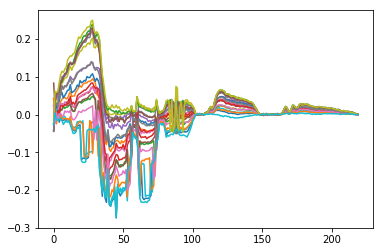

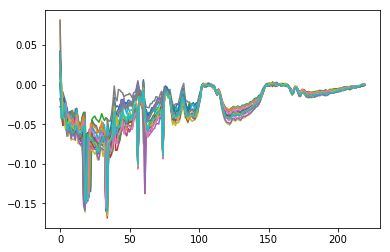

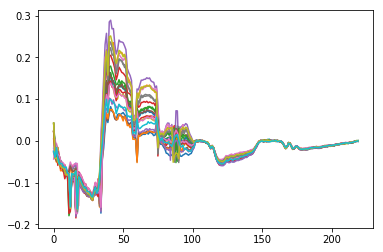

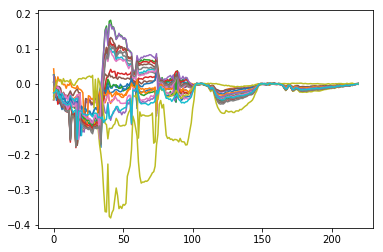

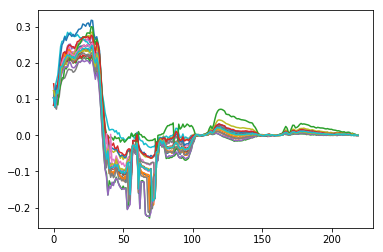

In [62]:
data = np.array(X)
labels = np.array(Y)
classes = []
for i in range(16):
    classes.append(data[(labels == i)[:,0]])
                  
#print(classes)
for class_inst in classes:
    for i in range(20):
        plt.plot(class_inst[i])
    plt.show()

In [65]:
print(X.shape)
print(Y.shape)
print(X_test.shape)
print(Y_test.shape)

(320, 220)
(320, 1)
(2557, 220)
(2557, 1)


In [66]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=100)
pca.fit(X)
X_t = pca.transform(X)
X_test_t = pca.transform(X_test)

In [69]:
clf = linear_model.LogisticRegression(C=1e5, multi_class='ovr')
clf.fit(X_t, Y)
clf.score(X_test_t, Y_test)

clf = linear_model.LogisticRegression(C=1e5, multi_class='ovr')
clf.fit(X, Y)
clf.score(X_test, Y_test)

0.6304262807978099

Nearest Neighbors 0.5220962064919827


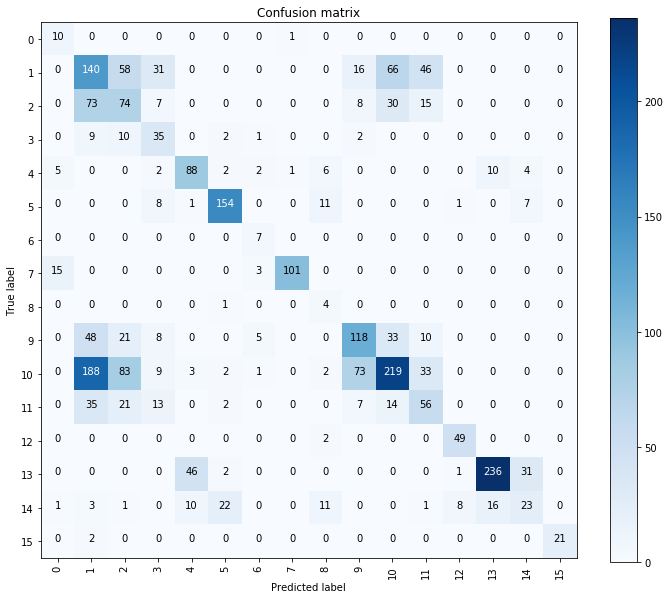

Linear SVM 0.3836527180289402


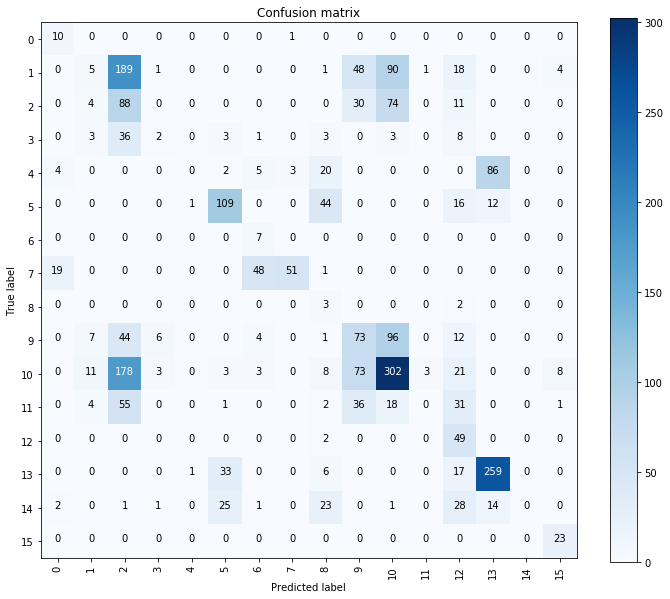

RBF SVM 0.4853343762221353


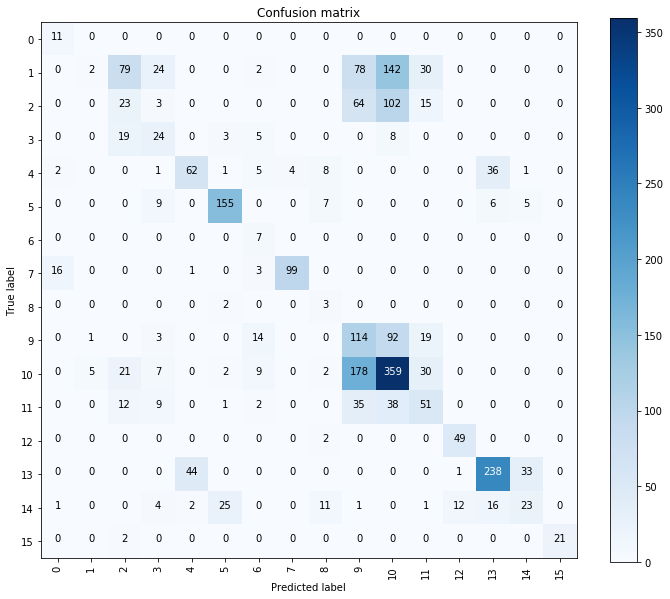

Decision Tree 0.3797418850215096


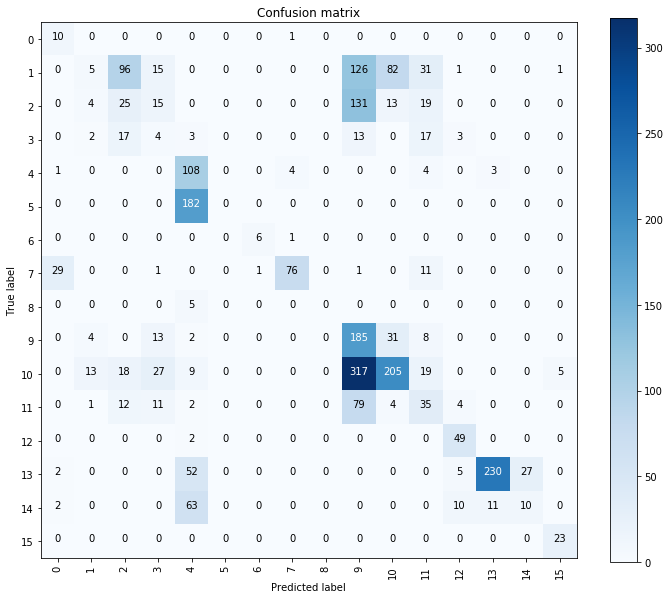

Random Forest 0.46147829487680875


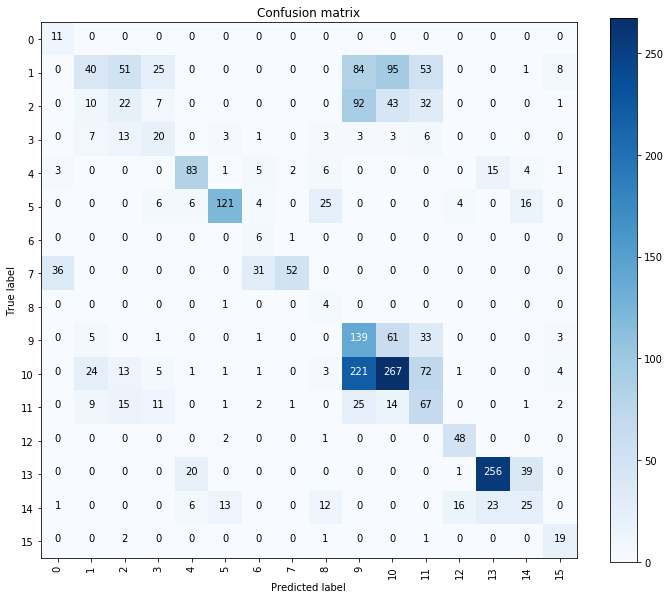

Neural Net 0.41454829878764177


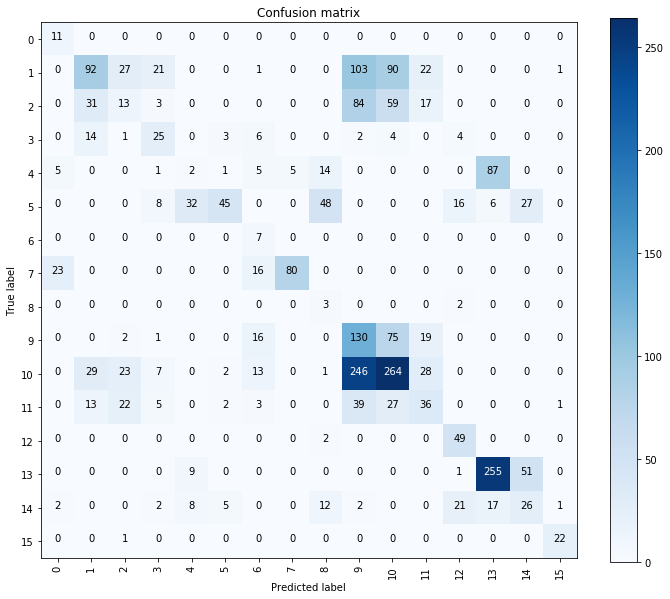

AdaBoost 0.10715682440359797


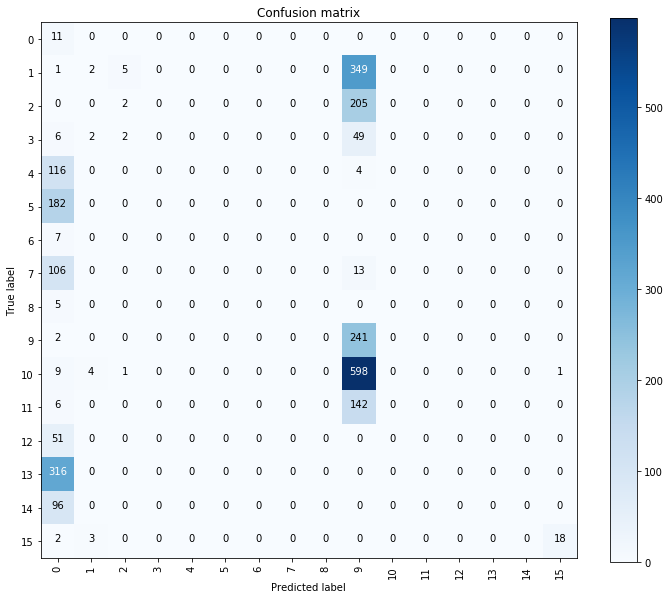

Naive Bayes 0.47673054360578804


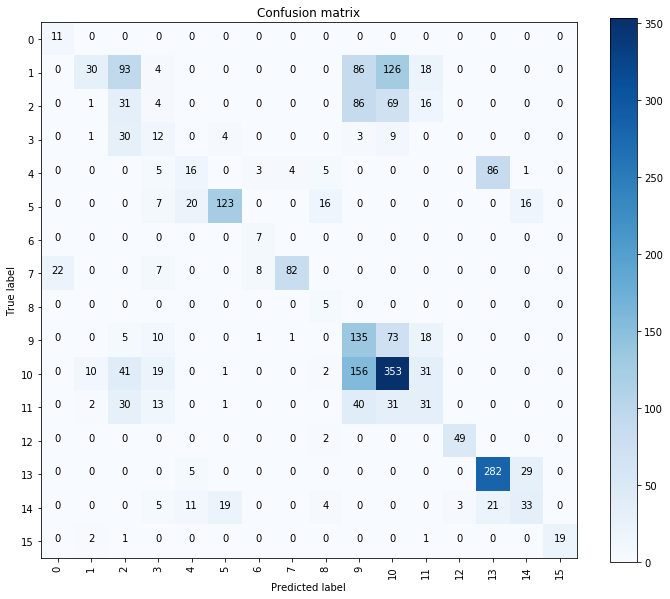

QDA 0.19827923347673054


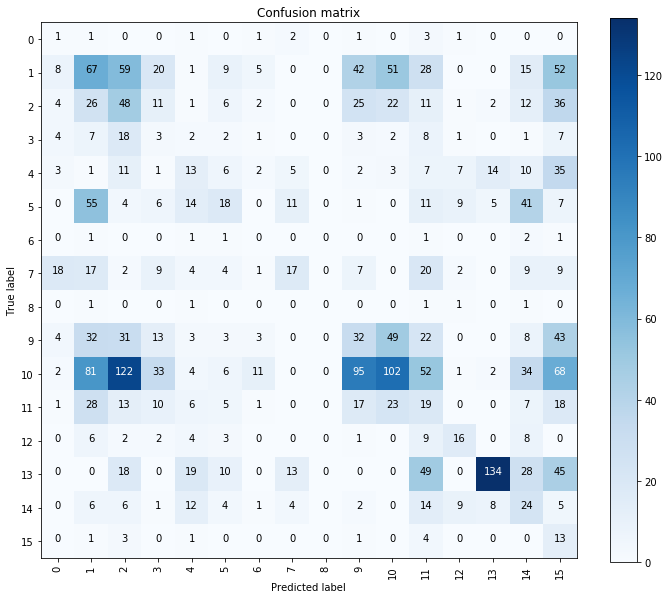

Laplace Logistic Regression 0.5999217833398514


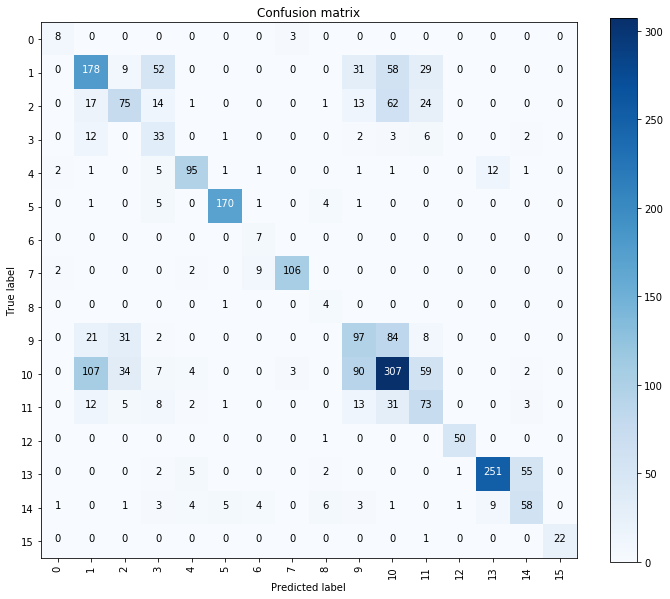

Variational Bayes 0.16151740320688307


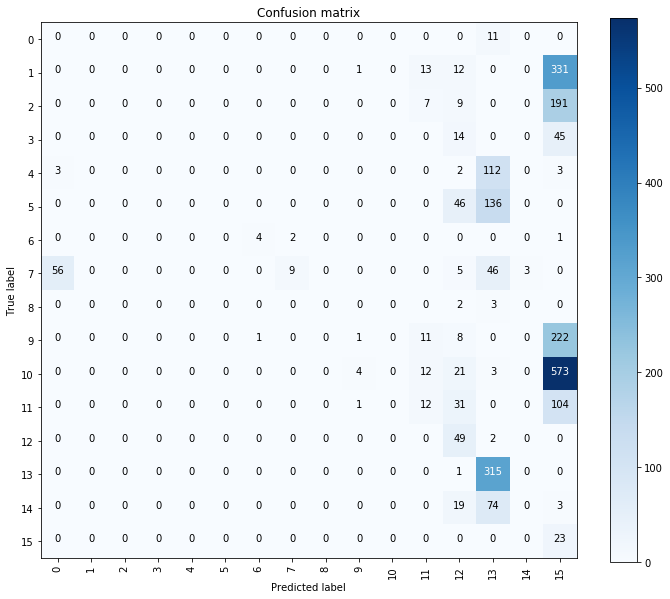

XGBoost 0.5400860383261634


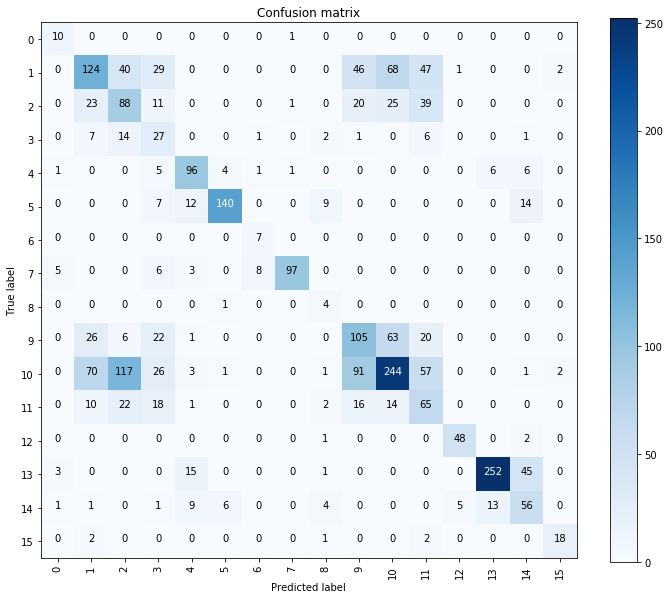

In [70]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         #"Gaussian Process",
         "Decision Tree", "Random Forest", 
         "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", 
         "Laplace Logistic Regression", "Variational Bayes",
         "XGBoost"
        ]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    EBLogisticRegression(tol_solver = 1e-3),
    VBLogisticRegression(),
    xgb.XGBClassifier(max_depth=3, n_estimators=600,
                        learning_rate=0.02,
                         n_thread=8, nthread=8)
    ]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    
    # fit and get score
    clf.fit(X, Y)
    score = clf.score(X_test, Y_test)
    print(name, score)
    
    # plot confusion matrices
    y_pred = clf.predict(X_test)
    cnf_matrix = confusion_matrix(Y_test, y_pred)
    np.set_printoptions(precision=2)

    class_names = list(range(16))
    plt.figure(figsize=(12, 10))
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False)

XGBoost 0.5338287055142745
Training score 1.0


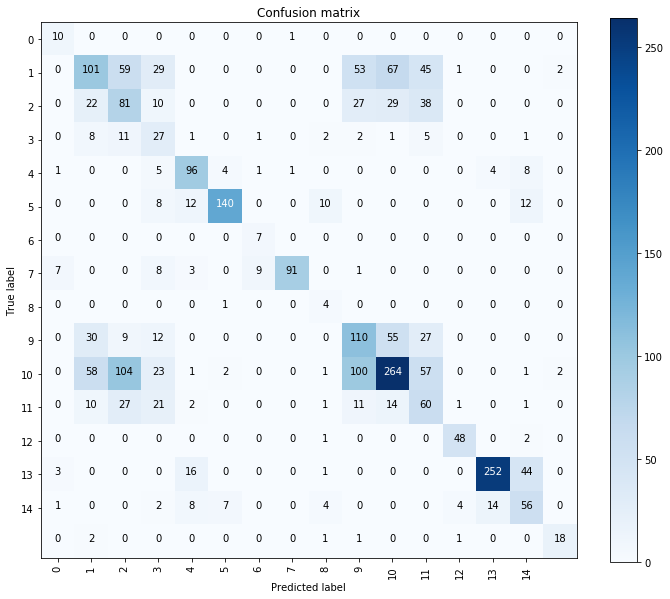

In [71]:
clf = xgb.XGBClassifier(max_depth=10, n_estimators=600,
                        learning_rate=0.02,
                        n_thread=8, nthread=8)

# fit and get score
clf.fit(X, Y)
score = clf.score(X_test, Y_test)
print("XGBoost", score)
score = clf.score(X, Y)
print("Training score", score)

# plot confusion matrices
y_pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

class_names = list(range(15))
plt.figure(figsize=(12, 10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False)

In [72]:
score = clf.score(X, Y)
print("Training score", score)

Training score 1.0


In [73]:
for j in range(10):
    for i in range(10):
        clf = xgb.XGBClassifier(max_depth=2 +i, 
                                n_estimators=600 + j*100,
                                learning_rate=0.02,
                                n_thread=8, nthread=8)

        # fit and get score
        clf.fit(X, Y)
        score = clf.score(X_test, Y_test)
        print("XGBoost", score)
        score = clf.score(X, Y)
        print("Training score", score)

XGBoost 0.5486898709425108
Training score 1.0
XGBoost 0.5400860383261634
Training score 1.0
XGBoost 0.5428236214313649
Training score 1.0
XGBoost 0.5463433711380524
Training score 1.0
XGBoost 0.5350019554165037
Training score 1.0
XGBoost 0.5310911224090731
Training score 1.0
XGBoost 0.5361752053187329
Training score 1.0
XGBoost 0.5346108721157606
Training score 1.0
XGBoost 0.5338287055142745
Training score 1.0
XGBoost 0.5338287055142745
Training score 1.0
XGBoost 0.5490809542432538
Training score 1.0
XGBoost 0.5357841220179899
Training score 1.0
XGBoost 0.543605788032851
Training score 1.0
XGBoost 0.5482987876417676
Training score 1.0
XGBoost 0.5373484552209621
Training score 1.0
XGBoost 0.529917872506844
Training score 1.0
XGBoost 0.5373484552209621
Training score 1.0
XGBoost 0.5334376222135315
Training score 1.0
XGBoost 0.5346108721157606
Training score 1.0
XGBoost 0.5346108721157606
Training score 1.0
XGBoost 0.5451701212358232
Training score 1.0
XGBoost 0.536566288619476
Training s